In [40]:
import numpy as np
import pandas as pd
import tensorflow as tf
import os
import cv2
import matplotlib.pyplot as plt
from tqdm import tqdm
import random

In [41]:
base_dir = "./archive"

train_cat_path = os.path.join(base_dir, "training_set", "training_set", "cats")
test_cat_path = os.path.join(base_dir, "test_set", "test_set", "cats")
train_dog_path = os.path.join(base_dir, "training_set", "training_set", "dogs")
test_dog_path = os.path.join(base_dir, "test_set", "test_set", "dogs")

In [42]:
def read_image_set(path, gray_scale = False, target_shape = (200, 200)):
    animals = []
    for file in tqdm(os.listdir(path)):
        current_img = plt.imread(os.path.join(path, file))
        current_img = cv2.resize(current_img, target_shape)
        # Convert to grayscale
        if gray_scale:
            current_img = cv2.cvtColor(current_img, cv2.COLOR_RGB2GRAY)
        animals.append(current_img)
    return animals

In [43]:
print(f"Reading cat images...")
cats = read_image_set(train_cat_path, gray_scale = True)

print(f"Reading dog images...")
dogs = read_image_set(train_dog_path, gray_scale = True)

Reading cat images...


100%|█████████████████████████████████████████████████████████████████████████████| 4000/4000 [00:12<00:00, 312.66it/s]


Reading dog images...


100%|█████████████████████████████████████████████████████████████████████████████| 4005/4005 [00:21<00:00, 182.71it/s]


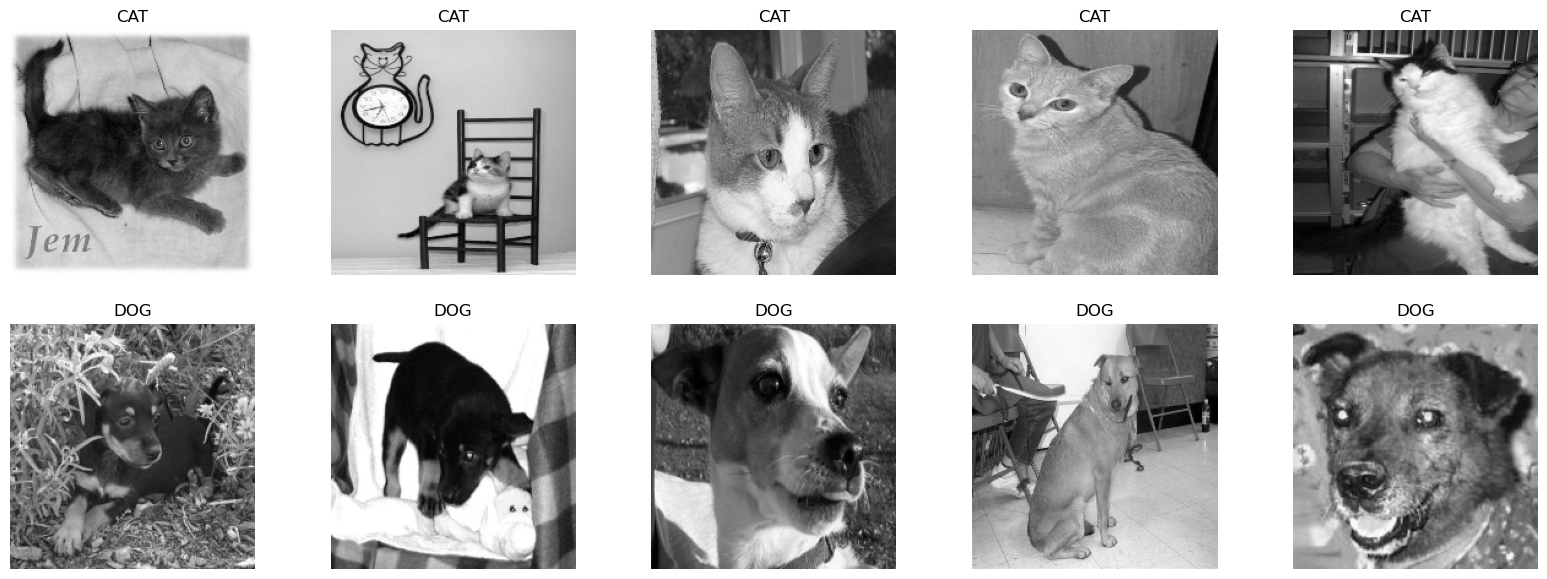

In [44]:
num_images = 5
_, axes = plt.subplots(2, num_images, figsize=(20, 7))

for i in range(num_images):
    axes[0, i].imshow(cats[random.randint(0, len(cats)-1)], cmap="gray")
    axes[0, i].axis("off")
    axes[0, i].set_title("CAT")
    
    axes[1, i].imshow(dogs[random.randint(0, len(dogs)-1)], cmap="gray")
    axes[1, i].axis("off")
    axes[1, i].set_title("DOG")
    
plt.show()

In [71]:
# Preprocess images
# Make all images same shape

In [79]:
#Create the training set
from sklearn.model_selection import train_test_split

training = cats + dogs
training_labels = [1]*len(cats) + [0]*len(dogs)

train_data, val_data, train_labels, val_labels = train_test_split(training, training_labels, test_size=0.1, random_state=42)
train_data, val_data, train_labels, val_labels = np.array(train_data), np.array(val_data), np.array(train_labels), np.array(val_labels)

train_data = tf.expand_dims(train_data, axis=-1)
val_data = tf.expand_dims(val_data, axis=-1)

print(f"Size of train data {train_data.shape}, size of labels {train_labels.shape}")
print(f"Size of validation data {val_data.shape}, size of labels {val_labels.shape}")

images_shape = train_data[0].shape

Size of train data (7204, 200, 200, 1), size of labels (7204,)
Size of validation data (801, 200, 200, 1), size of labels (801,)


In [80]:
# Create network
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.optimizers import Adam


model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=images_shape))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='sigmoid'))


model.compile(optimizer=Adam(learning_rate = 1e-3), loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_27 (Conv2D)          (None, 198, 198, 32)      320       
                                                                 
 max_pooling2d_24 (MaxPooli  (None, 99, 99, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_28 (Conv2D)          (None, 97, 97, 64)        18496     
                                                                 
 max_pooling2d_25 (MaxPooli  (None, 48, 48, 64)        0         
 ng2D)                                                           
                                                                 
 conv2d_29 (Conv2D)          (None, 46, 46, 128)       73856     
                                                                 
 max_pooling2d_26 (MaxPooli  (None, 23, 23, 128)     

In [ ]:
# Train network
history = model.fit(
    x = train_data,
    y = train_labels,
    batch_size = 32,
    epochs = 10,
    validation_data = (val_data, val_labels)
)

Epoch 1/10
226/226 [==============================] - 200s 852ms/step - loss: 2.8142 - accuracy: 0.5497 - val_loss: 0.6947 - val_accuracy: 0.5094
Epoch 2/10
184/226 [=======================>......] - ETA: 34s - loss: 0.6889 - accuracy: 0.5627

In [ ]:
# Evaluate
